# Function Optimization

Consider the function $f(x,y) = x^{2} + 20 y^{2}$ shown in Figure 5.63a in textbook (2nd edition). Begin by solving for the following:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

np.random.seed(42)
torch.manual_seed(42)

1. Calculate $\nabla f$, i.e., the gradient of $f$, and evaluate the gradient at $x = -20, y = 5$.

The gradient of $f(x,y) = x^2 + 20y^2$ is:
\begin{align}
\nabla f &= \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix} = \begin{bmatrix} 2x \\ 40y \end{bmatrix}
\end{align}

Evaluating at the starting point $x = -20, y = 5$:
\begin{align}
\nabla f(-20, 5) &= \begin{bmatrix} 2(-20) \\ 40(5) \end{bmatrix} = \begin{bmatrix} -40 \\ 200 \end{bmatrix}
\end{align}

In [3]:
def f(x, y):
    """The function f(x,y) = x^2 + 20*y^2"""
    return x**2 + 20*y**2

def gradient_f(x, y):
    """Gradient of f(x,y)"""
    return np.array([2*x, 40*y])

2. Implement the following gradient descent optimizers, which should take you from the starting point $x= -20, y= 5$ to near the minimum at $x= 0, y= 0$:

    a) Standard gradient descent, b) Gradient descent with momentum, starting with the momentum term $\rho = 0.99$, and c) Adam, starting with decay rates of $\beta_{1}=0.9$ and $\beta_{2}=0.999$.

In [4]:
class StandardGradientDescent:
    def __init__(self, learning_rate):
        self.lr = learning_rate

    def step(self, x, y):
        grad = gradient_f(x, y)
        return x - self.lr * grad[0], y - self.lr * grad[1]

In [5]:
class MomentumGradientDescent:
    def __init__(self, learning_rate, momentum=0.99):
        self.lr = learning_rate
        self.momentum = momentum
        self.velocity = np.array([0.0, 0.0])

    def step(self, x, y):
        grad = gradient_f(x, y)
        self.velocity = self.momentum * self.velocity + grad
        return x - self.lr * self.velocity[0], y - self.lr * self.velocity[1]

In [6]:
class AdamOptimizer:
    def __init__(self, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = np.array([0.0, 0.0])
        self.v = np.array([0.0, 0.0])
        self.t = 0

    def step(self, x, y):
        self.t += 1
        grad = gradient_f(x, y)

        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * grad**2

        m_hat = self.m / (1 - self.beta1**self.t)
        v_hat = self.v / (1 - self.beta2**self.t)

        # Update parameters
        update = self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return x - update[0], y - update[1]

3. Implement above optimizations (as in question 1.2) with different values of the learning rate $\alpha$. For each experiment (with different value of $\alpha$), plot how $x$ and $y$ change over time, as shown in Figure 5.63b in textbook (2nd edition).

In [7]:
def run_optimization(optimizer, start_x=-20, start_y=5, max_steps=500):
    """Run optimization and return trajectory"""
    x, y = start_x, start_y
    trajectory_x = [x]
    trajectory_y = [y]

    for _ in range(max_steps):
        x, y = optimizer.step(x, y)
        trajectory_x.append(x)
        trajectory_y.append(y)

        if abs(x) < 1e-6 and abs(y) < 1e-6:
            break

    return np.array(trajectory_x), np.array(trajectory_y)

Standard GD (α=0.005): Final x=-0.1314, y=0.0000, distance=0.131410
MomentumGD (α=0.005): Final x=-1.5945, y=0.4129, distance=1.647062
Adam (α=0.005): Final x=-17.5701, y=2.8025, distance=17.792221
Standard GD (α=0.01): Final x=-0.0008, y=0.0000, distance=0.000820
MomentumGD (α=0.01): Final x=0.4062, y=-0.3287, distance=0.522573
Adam (α=0.01): Final x=-15.2881, y=1.2973, distance=15.343030
Standard GD (α=0.05): Final x=-0.0000, y=5.0000, distance=5.000000
MomentumGD (α=0.05): Final x=0.9991, y=-0.5662, distance=1.148358
Adam (α=0.05): Final x=-3.2415, y=0.0000, distance=3.241493
Standard GD (α=0.1): Final x=-0.0000, y=181801458979357151502878235654535000410688901593376615273526941466786026778792257337514235446013940536922286485931318342557739929224005105761872745540765973041347069996822681821869370899542793286058903850574630575923780921502450092330713088.0000, distance=inf
MomentumGD (α=0.1): Final x=-1.6517, y=18438625397376286745435870068736.0000, distance=184386253973762867454358700

/tmp/ipython-input-816132879.py:40: RuntimeWarning: overflow encountered in scalar power
  final_distance = np.sqrt(traj_x[-1]**2 + traj_y[-1]**2)


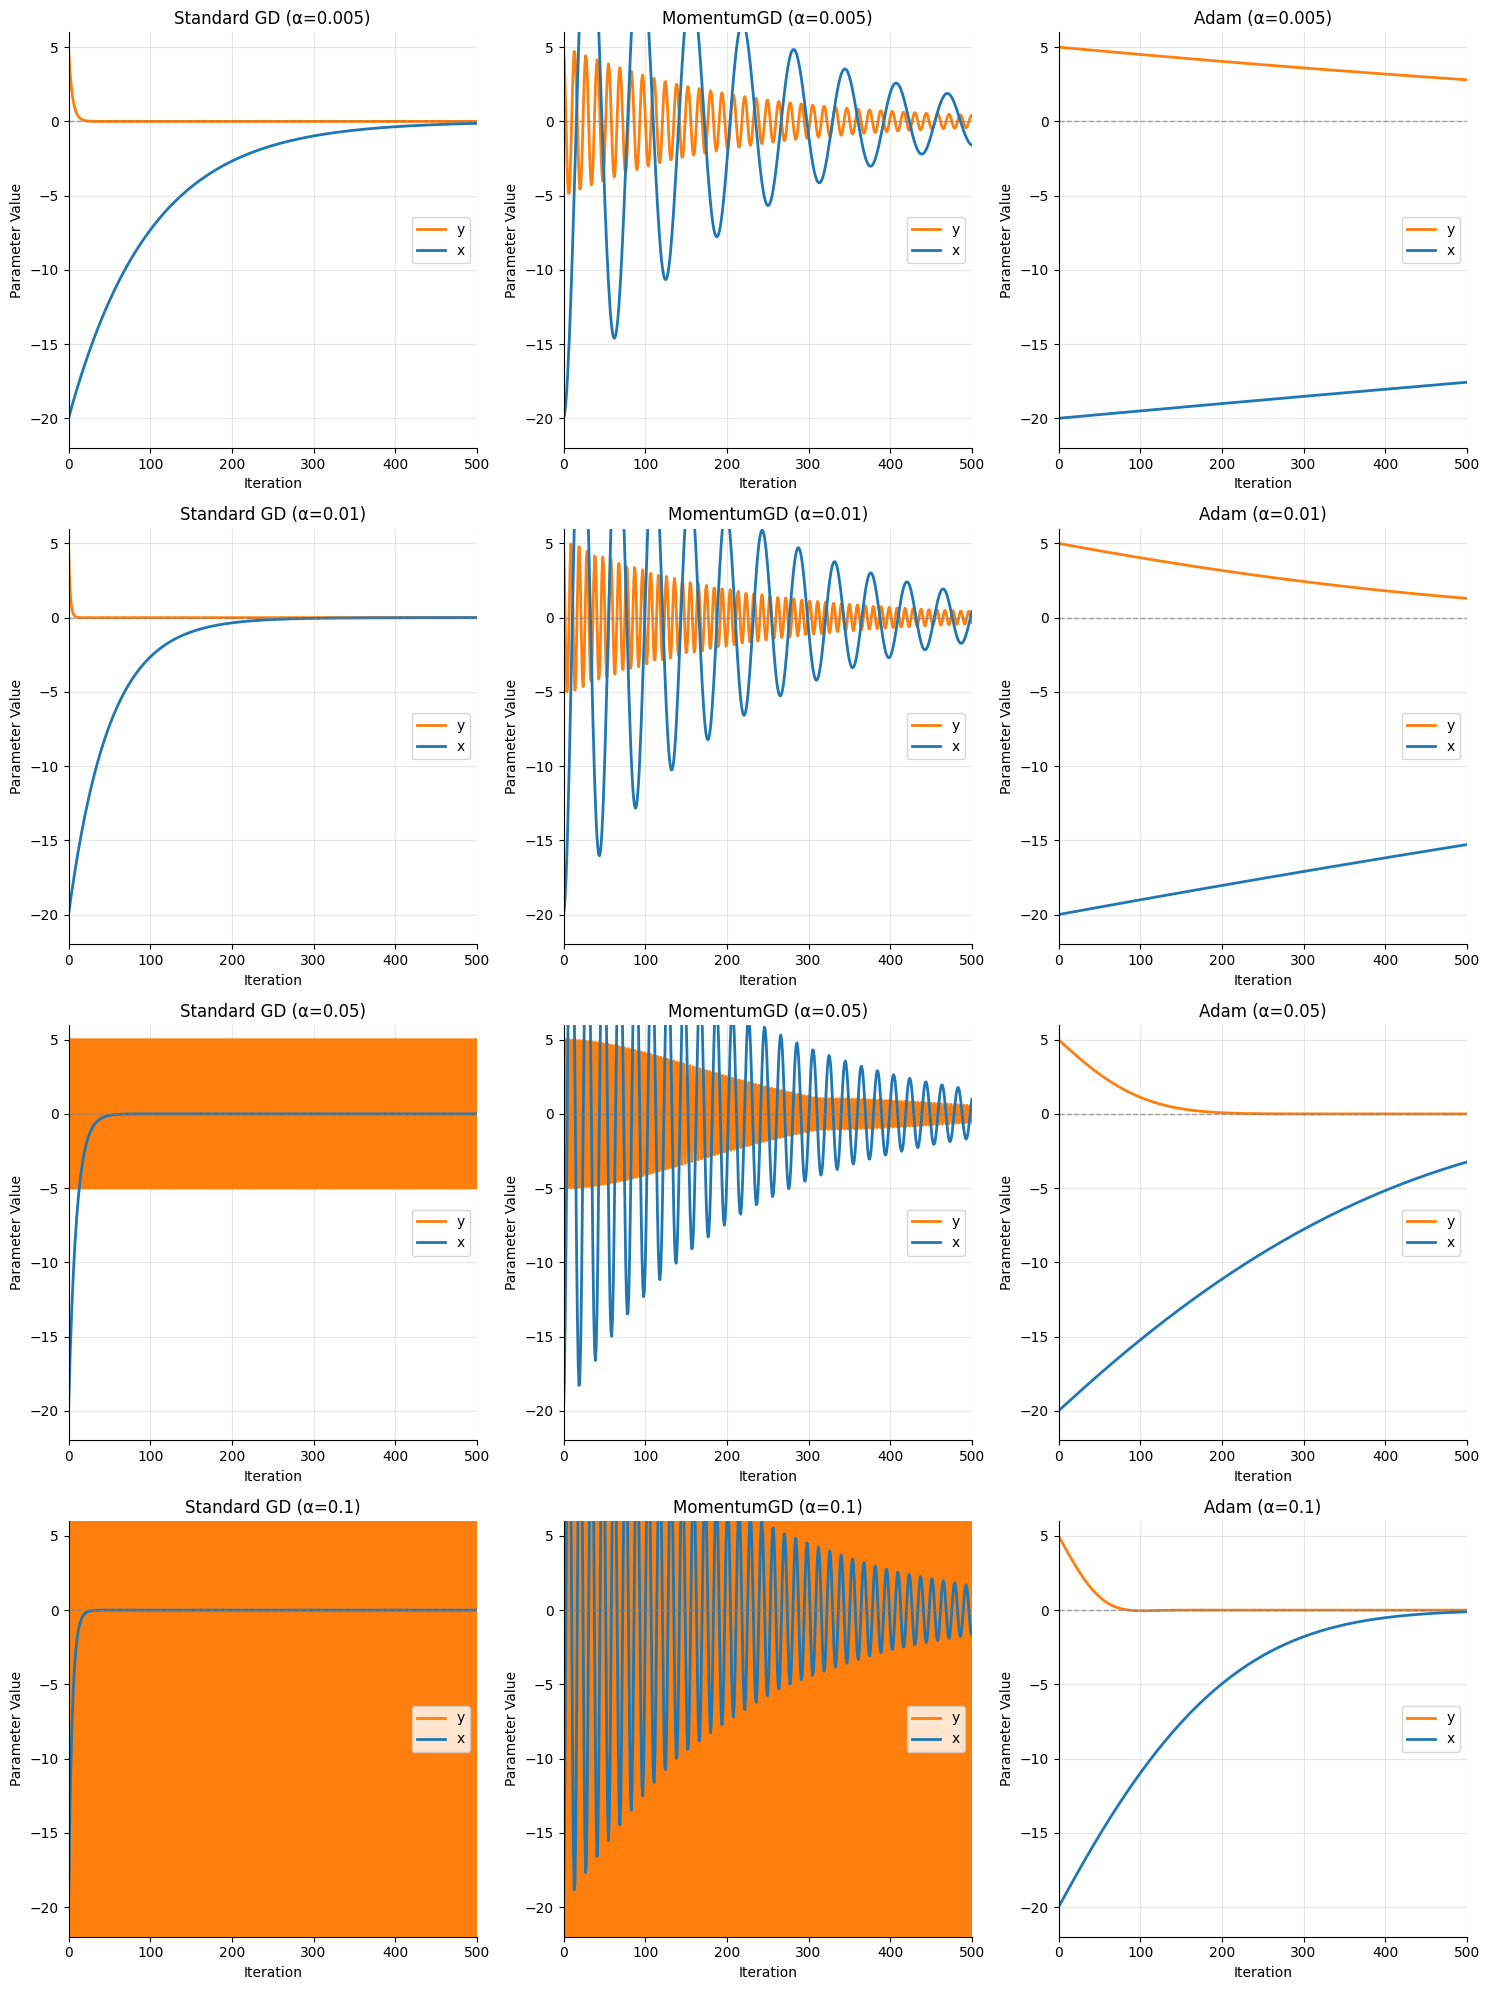

In [8]:
def plot_optimization_comparison(learning_rates):
    """Plot parameter change over time"""
    fig, axes = plt.subplots(len(learning_rates), 3, figsize=(15, 5*len(learning_rates)))
    if len(learning_rates) == 1:
        axes = axes.reshape(1, -1)

    optimizer_names = ['Standard GD', 'MomentumGD', 'Adam']

    for lr_idx, lr in enumerate(learning_rates):
        optimizers = [
            StandardGradientDescent(lr),
            MomentumGradientDescent(lr, momentum=0.99),
            AdamOptimizer(lr, beta1=0.9, beta2=0.999)
        ]

        for opt_idx, opt_name in enumerate(optimizers):
            ax = axes[lr_idx, opt_idx]

            traj_x, traj_y = run_optimization(opt_name)

            iterations = np.arange(len(traj_x))


            ax.plot(iterations, traj_y, color='#ff7f0e', label='y', linewidth=2)  # Orange
            ax.plot(iterations, traj_x, color='#1f77b4', label='x', linewidth=2)  # Blue

            ax.axhline(y=0, color='gray', linestyle='--', alpha=0.7, linewidth=1)

            ax.set_xlim(0, 500)
            ax.set_ylim(-22, 6)
            ax.set_xlabel('Iteration')
            ax.set_ylabel('Parameter Value')
            ax.set_title(f'{optimizer_names[opt_idx]} (α={lr})')
            ax.legend(loc='center right')
            ax.grid(True, alpha=0.3)

            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

            final_distance = np.sqrt(traj_x[-1]**2 + traj_y[-1]**2)
            print(f"{optimizer_names[opt_idx]} (α={lr}): Final x={traj_x[-1]:.4f}, y={traj_y[-1]:.4f}, "
                  f"distance={final_distance:.6f}")

    plt.tight_layout()
    plt.savefig('optimization_comparison.png')
    plt.show()

learning_rates = [0.005, 0.01, 0.05, 0.1]
plot_optimization_comparison(learning_rates)

4. How do the optimizers behave differently? Is there a single learning rate that makes all the optimizers converge towards $x=0,\; y=0$ in under 200 steps? Does each optimizer monotonically trend towards $x=0,\; y=0$?

Analysing the plots for different learning rates, **Standard gradient descent** seems to be highly sensitive to the choice of the
learning rate. If the learning rate is too large it diverges while too small, and convergence is quick (for the given function).

**Momentum gradient descent** looks to imporve upon standard GD by building velocity in consistent directions and dampening oscillations through its memory of previous gradients. However, this also fails for higher learning rate as evident for the convergence plot.

**Adam** however performs the most conssistant among three. For the different learning rates above, only Adam is monotonically trading towards $x=0,\; y=0$.

From above experiments, no single learning rate makes all the optimizer trend towards $x=0,\; y=0$ in under 200 steps. For example, learning rate of $0.01$ is the closest to let all the optimizers to converge but it will required more steps than 200.